# Random Forest Regression

In [1]:
########PROBLEMAS NO LINEALES 
#al haber más árboles que en decision tree, se producen más splits
#random forest es más predictivo que decision tree porque se está empleando el algoritmo múltiples veces

## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [3]:
dataset = pd.read_csv('Position_Salaries.csv')
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Random Forest Regression model on the whole dataset

In [6]:
#se establecen 10 árboles o estimadores y el resultado es la media de todas las estimaciones
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0) #el número de árboles se determina probando o utilizando k-fold cross validation o grid search
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

## Predicting the results

In [7]:
y_pred = regressor.predict(X_test)
y_pred 

array([ 59000., 440000.])

## Predicting a new result

In [8]:
regressor.predict([[6.5]])

array([175000.])

## Visualising the Random Forest Regression results (higher resolution)

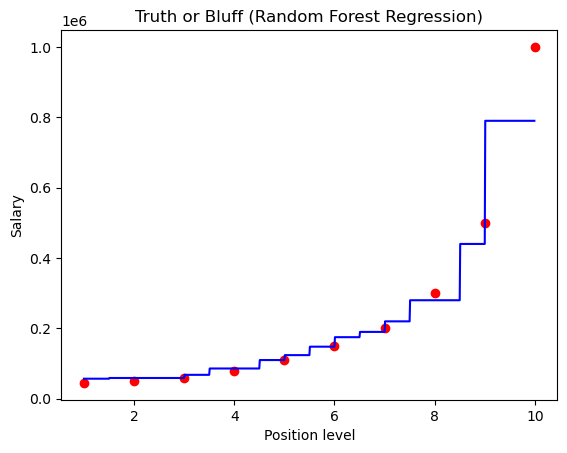

In [9]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Random Forest Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Evaluating the Model Performance

In [10]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred) #se debería hacer sobre un mismo dataset para todos los casos

0.9627995867768595